<a href="https://colab.research.google.com/github/iliaxant/Pattern_Recognition_HW2/blob/main/HW_2_PR_58545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2η Εργασία**

## Αναγνώριση Προτύπων - Ακαδημαϊκό έτος 2025-2026

## Ηλίας Ξανθόπουλος 58545

## GitHub Repo: https://github.com/iliaxant/Pattern_Recognition_HW2

---

## **Set-Up**

1) Χειροκίνητο ανέβασμα του αρχείου *Data_exercise1.csv* και του dataset *wine.zip*.

2) Unziping του αρχείου *wine.zip*:

In [1]:
import zipfile

zip_path = '/content/wine.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

print("Data unzipped successfully to /content directory.")

Data unzipped successfully to /content directory.


3) Εγκατάσταση και φόρτωση των απαραίτητων βιβλιοθηκών:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle

---

## **Άσκηση 1**

Φόρτωση των δεδομένων (*Data_exercise1.csv* αρχείο) και ομαδοποίηση ανά κλάσεις.

In [3]:
df = pd.read_csv('/content/Data_exercise1.csv', header=None)

w1 = df[df[2] == 1]
w2 = df[df[2] == 2]
w3 = df[df[2] == 3]


print('------- Contents of "data.csv": ------')
print(df)

print('\n-------------- Class 1: -------------')
print(w1)

print('\n-------------- Class 2: -------------')
print(w2)

print('\n-------------- Class 3: -------------')
print(w3)

------- Contents of "data.csv": ------
           0        1  2
0    0.53767  0.84038  1
1    1.83390 -0.88803  1
2   -2.25880  0.10009  1
3    0.86217 -0.54453  1
4    0.31877  0.30352  1
..       ...      ... ..
295  2.39140 -2.11600  3
296  2.26290 -2.81970  3
297  1.25010 -2.44910  3
298  3.91050 -2.31700  3
299  3.86710 -1.82940  3

[300 rows x 3 columns]

-------------- Class 1: -------------
           0        1  2
0   0.537670  0.84038  1
1   1.833900 -0.88803  1
2  -2.258800  0.10009  1
3   0.862170 -0.54453  1
4   0.318770  0.30352  1
..       ...      ... ..
95  0.187330  0.82606  1
96 -0.082494  1.52700  1
97 -1.933000  0.46691  1
98 -0.438970 -0.20971  1
99 -1.794700  0.62519  1

[100 rows x 3 columns]

-------------- Class 2: -------------
           0       1  2
100  3.18320  3.0799  2
101  1.97020  2.0515  2
102  3.94920  3.4115  2
103  3.30710  3.6770  2
104  3.13520  3.8577  2
..       ...     ... ..
195  2.92920  2.7901  2
196  0.51372  1.3011  2
197  3.58120  3.607

Αναπάσταση των δειγμάτων στον χώρο των χαρακτηριστικών.

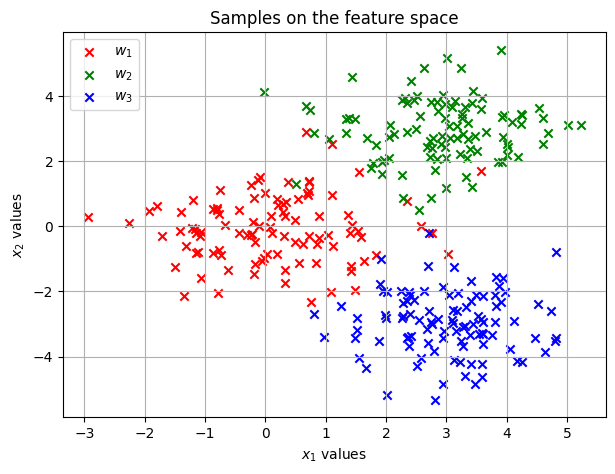

In [4]:
plt.figure(figsize=(7, 5))

plt.scatter(w1[0], w1[1], color='r', marker='x', label=r'$w_1$')
plt.scatter(w2[0], w2[1], color='g', marker='x', label=r'$w_2$')
plt.scatter(w3[0], w3[1], color='b', marker='x', label=r'$w_3$')

plt.title('Samples on the feature space')
plt.xlabel("$x_1$ values")
plt.ylabel("$x_2$ values")
plt.legend()
plt.grid(True)
plt.show()

### **Α.**

Για την εκτίμηση των pdf $p(x|ω_1)$, $p(x|ω_2)$ και $p(x|ω_3)$ μέσω της μεθόδου παραθύρων Parzen χρησιμοποιείται συνάρτηση παραθύρου

$φ(x-x_i)=\frac{1}{(2π)^{d/2}}e^{-\frac{||x-x_i||_{L2}^2}{2}}$

για την εκτίμηση της pdf μέσω της σχέσης $p_N(x)=\frac{1}{N}∑_{i=1}^{N}{\frac{1}{h_N^d}φ(x-x_i)}$

Για $d=2$ (δύο χαρακτηριστικά: $x_1$ και $x_2$) και κανονικοποίηση με $h_N$ έχουμε συνάρτηση παραθύρου

$φ(\frac{x-x_i}{h_N})=\frac{1}{2π}e^{-\frac{||x-x_i||_{L2}^2}{2h_N^2}}$

και pdf

$p_N(x)=\frac{1}{N}∑_{i=1}^{N}{\frac{1}{h_N^2}φ(\frac{x-x_i}{h_N})}$

In [5]:
def parzen_window(diffs, h_N):

  dist_L2 = np.sum(diffs ** 2, axis = 2)

  return  np.exp(-dist_L2 / (2 * h_N ** 2)) / (2 * np.pi)


In [6]:
def parzen_pdf(X, x_i, h_N):

  diffs = X[:, np.newaxis, :] - x_i[np.newaxis, :, :]

  phi = parzen_window(diffs, h_N)
  pdf = np.mean(phi, axis=1) / h_N ** 2

  return pdf


Ορισμός συνάρτησης για τον σχεδιασμό γραφικής παράστασης της pdf της κάθε κλάσης στον χώρο των χαρακτηριστικών. Και οι 3 pdf είναι σε κοινά διαγράμματα, ένα 2D και ένα 3D με προσανατολισμό (1,1,1).

In [28]:
def pdf_graph_3D(xx1, xx2, classes_w, class_pdfs, h_N):

  fig = plt.figure(figsize=(14, 6))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.scatter(classes_w[0][0], classes_w[0][1], color='r', marker='x', label=r'$w_1$', alpha=0.45)
  ax1.scatter(classes_w[1][0], classes_w[1][1], color='g', marker='x', label=r'$w_2$', alpha=0.45)
  ax1.scatter(classes_w[2][0], classes_w[2][1], color='b', marker='x', label=r'$w_3$', alpha=0.45)

  ax1.contour(xx1, xx2, class_pdfs[0], levels=15, cmap = 'Reds')
  ax1.contour(xx1, xx2, class_pdfs[1], levels=15, cmap = 'Greens')
  ax1.contour(xx1, xx2, class_pdfs[2], levels=15, cmap = 'Blues')

  ax1.set_title(f"PDFs of all classes (Parzen Windows method, $h_N$={h_N})")
  ax1.set_xlabel("$x_1$ values")
  ax1.set_ylabel("$x_2$ values")
  ax1.legend()
  ax1.grid(True)


  ax2 = fig.add_subplot(1, 2, 2, projection='3d')
  ax2.plot_surface(xx1, xx2, class_pdfs[0], cmap='Reds', alpha=0.4, linewidth=0, antialiased=True)
  ax2.plot_surface(xx1, xx2, class_pdfs[1], cmap='Greens', alpha=0.4, linewidth=0, antialiased=True)
  ax2.plot_surface(xx1, xx2, class_pdfs[2], cmap='Blues', alpha=0.4, linewidth=0, antialiased=True)

  ax2.scatter(classes_w[0][0], classes_w[0][1], 0, color='r', marker='x', label='$w_1$')
  ax2.scatter(classes_w[1][0], classes_w[1][1], 0, color='g', marker='x', label='$w_2$')
  ax2.scatter(classes_w[2][0], classes_w[2][1], 0, color='b', marker='x', label='$w_3$')

  ax2.set_title(f"PDFs of all classes (Parzen Windows method, $h_N$={h_N}) in (1,1,1) view")
  ax2.set_xlabel("$x_1$ values")
  ax2.set_ylabel("$x_2$ values")
  ax2.set_zlabel("Propability Density")
  ax2.view_init(elev=30, azim=45)
  ax2.legend()

  plt.show()


Εφαρμογή της μεθόδου παραθύρων Parzen για καθεμία από της κλάσεις σε όλο το πλήθος των δεδομένων του "Data_exercise1.csv" για $h_N=0.3$, $h_N=0.7$ και $h_N=0.1$. Απεικόνιση και των τριών υπολογισμένων pdf μέσω της *pdf_graph_3D* και για τις τρεις τιμές του $h_N$.

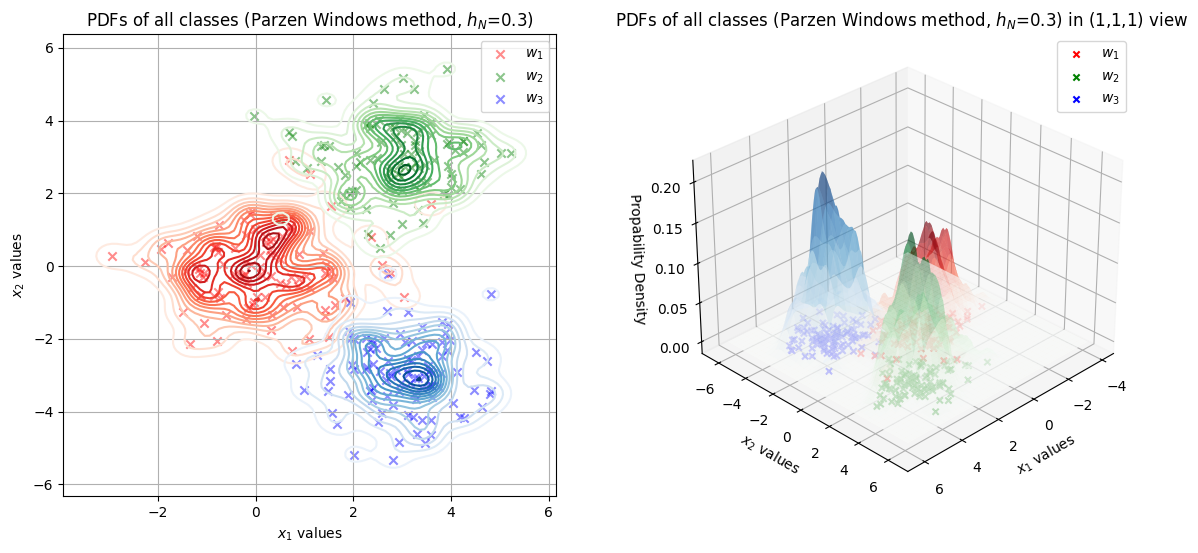

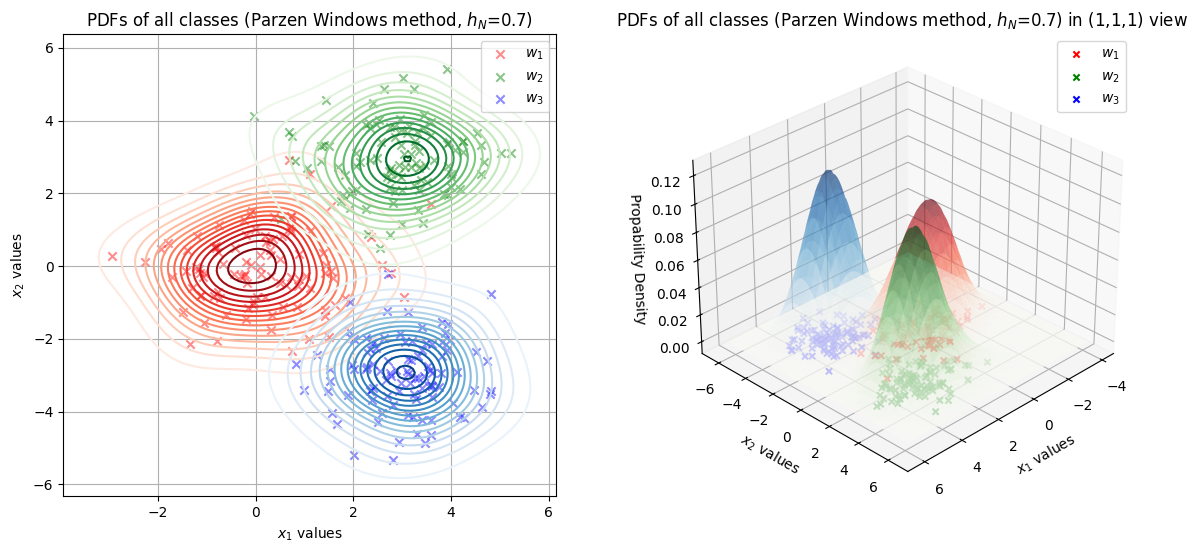

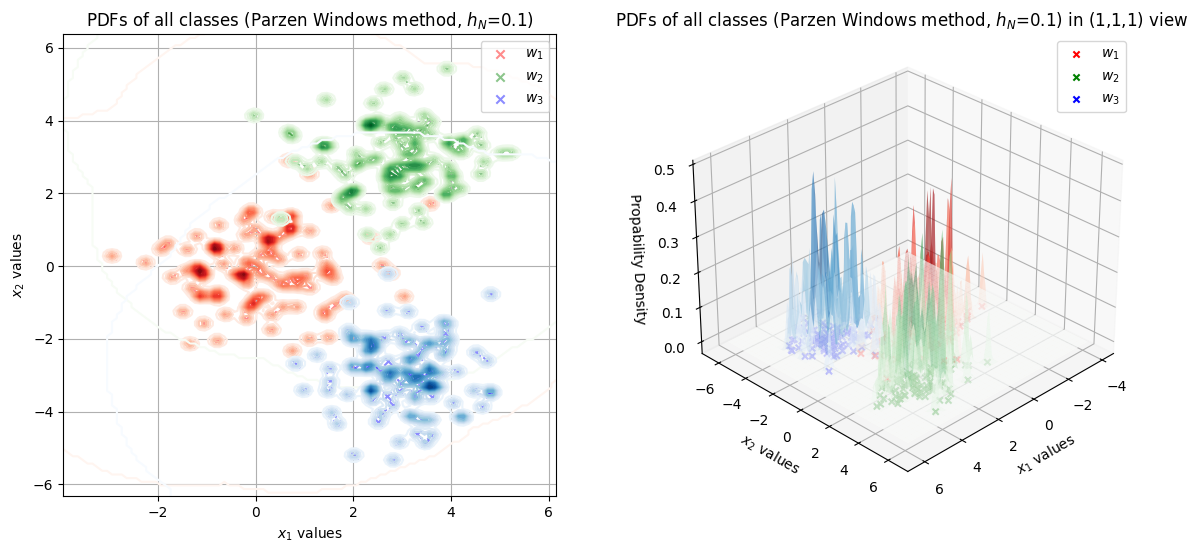

In [29]:
h_N = [0.3, 0.7, 0.1]

x1 = np.arange(df[0].min()-1, df[0].max()+1, 0.1)
x2 = np.arange(df[1].min()-1, df[1].max()+1, 0.1)

xx1, xx2 = np.meshgrid(x1,x2)
X = np.column_stack((xx1.ravel(), xx2.ravel()))

classes_w = [w1, w2, w3]
class_pdfs=[]            # For saving for later the pdfs calculated with h_N=0.3
for h in h_N:

    p_1 = parzen_pdf(X, w1[[0,1]].to_numpy(), h).reshape(xx1.shape)
    p_2 = parzen_pdf(X, w2[[0,1]].to_numpy(), h).reshape(xx1.shape)
    p_3 = parzen_pdf(X, w3[[0,1]].to_numpy(), h).reshape(xx1.shape)

    if h == h_N[0]:

        class_pdfs.append(p_1)
        class_pdfs.append(p_2)
        class_pdfs.append(p_3)

    pdf_graph_3D(xx1, xx2, classes_w, [p_1, p_2, p_3], h)


Για κάθε μια από τις τιμές του $h_N$ (τιμή διακύμανσης) παρατηρούμε μέσω των διαγραμμάτων διαφορετικά επίπεδα προσαρμογής των κανονικών κατανομών στα δεδομένα. Πιο συγκεκριμένα:

*   Για $h_N=0.7$ παρατηρείται ότι η τελική pdf της κάθε κλάσης αδυνατεί να "αγκαλιάσει" σωστά τα δεδομένα. Η τελική pdf καταλαμβάνει όπως θα έπρεπε την περιοχή στην οποία είναι διασκορπισμένα τα δείγματα της, με την κορυφή της να είναι στο κέντρο του cluster, αλλά δεν διαθέτει τα τοπικά μέγιστα και τις ιδιομορφίες που προκαλούν τα διασκορπισμένα δειγματα. Με λίγα λόγια παρατηρείται underfitting της τελικής επιφάνειας στα δεδομένα. Αυτό οφείλεται στο ότι η διακύμανση $h_N$ των συστατικών κανονικών κατανομών (καθεμία με κέντρο ένα από τα δείγματα) είναι τόσο μεγάλη, ωστέ να αλληλοεπικαλύπτονται τπερβολικά και έτσι η υπέρθεση τους να μην διαθέτει ιδιαίτερα χαρακτηριστικά, όπως κορυφές.

*   Για $h_N=0.1$ η τελική επιφάνεια της pdf της κάθε κλάσης "αγκαλιάζει" τα δείγματα σε υπερβολικό βαθμό. Δηλαδή, αντί να υπάρχει μια επιφάνεια με κάποιες εντός ορίων ιδιομορφίες, δημιοργείται μια pdf η οποία στην θέση του κάθε δείγματος χαρακτηρίζεται από μία ψηλή και πολύ απότομη κορυφή. Αυτό είναι το λεγόμενο overfitting, δηλαδή υπερπροσαρμογή της επιφάνειας στα δεδομένα και προκαλείται επειδή η διακύμανση $h_N$ είναι τόσο μικρή, ώστε οι συνιστώσες κανονικές κατανομές να μην αλληλοεπικαλύπτονται καθόλου και άρα η υπέρθεση τους να είναι απλώς όλες οι κανονικές κατανομές διαχωρισμένες.  

*   Η εφαρμογή της μεθόδου με $h_N=0.3$ βρίσκεται αναμέσα στις δύο παραπάνω περιπτώσεις προσφέροντας μια επιφάνεια που ακολουθεί αρκετά καλά τα δεδομένα, έτσι ώστε να χαρακτηρίζεται από τις ιδιομορφίες που δεν διαθέτει μια underfitted επιφάνεια αλλά και ταυτόχρονα να μην υπάρχουν οι αποτόμες και απομονωμένες κορυφές του overfitting.

Επιλογή με τυχαίο τρόπο του 25% του συνολικού dataset (25% από κάθε κλάση) για την εκ νέου εφαρμογή της μεθόδου παραθύρων Parzen.

In [19]:
data_percentage = 0.25         # Percentage of data to keep
rand_seed = 10                 # Seed for reproducibility

w1_size = int(w1.shape[0] * data_percentage)
w2_size = int(w2.shape[0] * data_percentage)
w3_size = int(w3.shape[0] * data_percentage)

w1_reduced = shuffle(w1, random_state=rand_seed, n_samples=w1_size)
w2_reduced = shuffle(w2, random_state=rand_seed, n_samples=w2_size)
w3_reduced = shuffle(w3, random_state=rand_seed, n_samples=w3_size)


print('\n-------------- Randomly Reduced Class 1: -------------')
print(w1_reduced)

print('\n-------------- Randomly Reduced Class 2: -------------')
print(w2_reduced)

print('\n-------------- Randomly Reduced Class 3: -------------')
print(w3_reduced)


-------------- Randomly Reduced Class 1: -------------
          0        1  2
19  1.41720 -1.20780  1
14  0.71474  0.96095  1
43  0.31286 -0.28565  1
37 -0.75493  1.12750  1
66 -1.49160 -1.25710  1
3   0.86217 -0.54453  1
79 -0.19605  0.86202  1
41 -0.24145 -0.26200  1
38  1.37030  0.35018  1
68 -1.06160 -0.17653  1
2  -2.25880  0.10009  1
1   1.83390 -0.88803  1
60 -1.08910 -0.29375  1
53 -1.11350 -0.79816  1
95  0.18733  0.82606  1
74 -0.76485  0.39135  1
92  0.72225 -0.30311  1
26  0.72689  1.09840  1
59  1.11740 -0.58903  1
46 -0.16488 -1.15640  1
90 -1.14800 -0.19522  1
70 -0.61560 -1.33200  1
50 -0.86365  0.52006  1
44 -0.86488 -0.83137  1
76 -1.42240 -0.13028  1

-------------- Randomly Reduced Class 2: -------------
            0        1  2
119  2.751000  3.82570  2
114  2.288000  0.87634  2
143  2.971000  3.74770  2
137 -0.029177  4.13850  2
166  3.471600  2.76610  2
103  3.307100  3.67700  2
179  2.945100  4.03600  2
141  3.933700  2.74490  2
138  2.543000  0.50311  2
168 

Αναπάρασταση των επιλεγμένων δειγμάτων στον χώρο των χαρακτηριστικών.

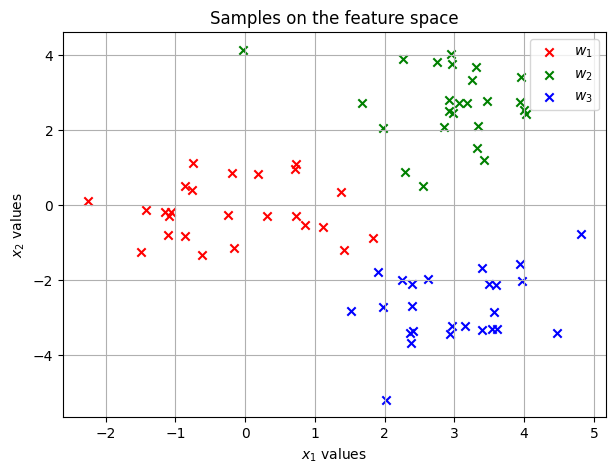

In [20]:
plt.figure(figsize=(7, 5))

plt.scatter(w1_reduced[0], w1_reduced[1], color='r', marker='x', label='$w_1$')
plt.scatter(w2_reduced[0], w2_reduced[1], color='g', marker='x', label='$w_2$')
plt.scatter(w3_reduced[0], w3_reduced[1], color='b', marker='x', label='$w_3$')

plt.title('Samples on the feature space')
plt.xlabel("$x_1$ values")
plt.ylabel("$x_2$ values")
plt.legend()
plt.grid(True)
plt.show()

Εφαρμογή της μεθόδου παραθύρων Parzen για καθεμία από της μειωμένες κλάσεις για τα ίδια $h_N$. Απεικόνιση και των τριών υπολογισμένων pdf στον χώρο των χαρακτηριστικών με δύο προσανατολισμούς και για τις τρεις τιμές του $h_N$.

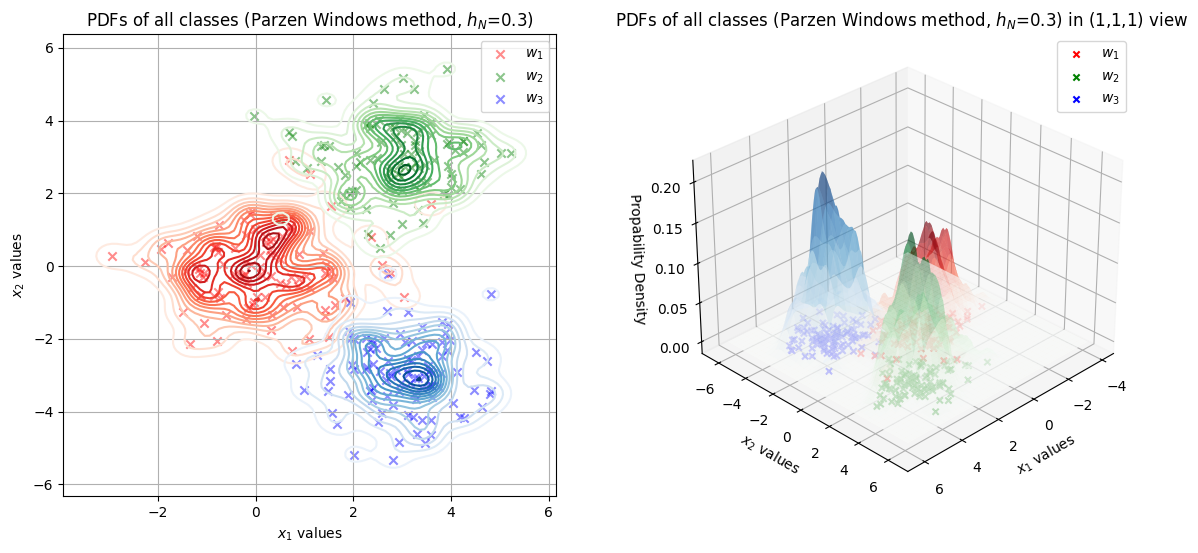

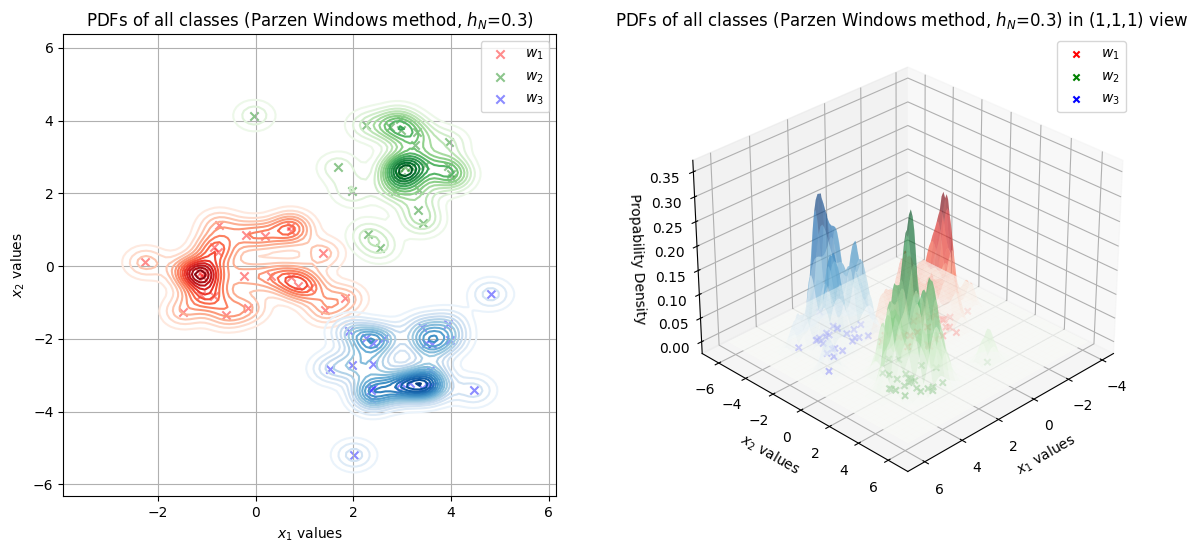

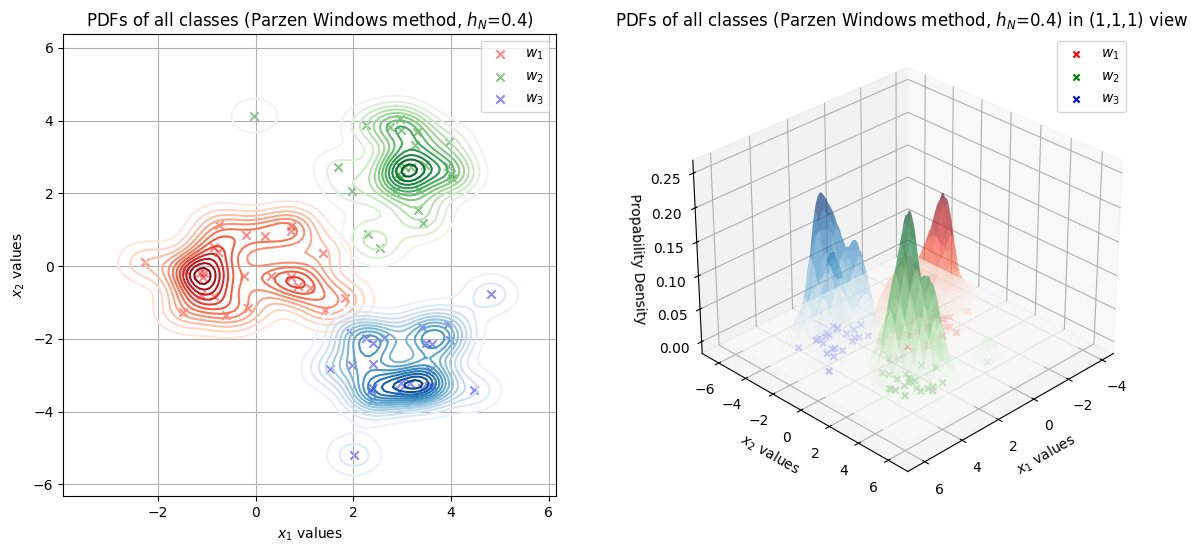

In [33]:
h_N_old = 0.3
h_N_new = 0.4

# The line below recreates the previous pdf diagrams (h_N = 0.3) for comparison.
pdf_graph_3D(xx1, xx2, classes_w, class_pdfs, h_N_old)

classes_w_reduced = [w1_reduced, w2_reduced, w3_reduced]
p_1_reduced = parzen_pdf(X, w1_reduced[[0,1]].to_numpy(), h_N_old).reshape(xx1.shape)
p_2_reduced = parzen_pdf(X, w2_reduced[[0,1]].to_numpy(), h_N_old).reshape(xx1.shape)
p_3_reduced = parzen_pdf(X, w3_reduced[[0,1]].to_numpy(), h_N_old).reshape(xx1.shape)

pdf_graph_3D(xx1, xx2, classes_w_reduced, [p_1_reduced, p_2_reduced, p_3_reduced], h_N_old)

p_1_reduced_new = parzen_pdf(X, w1_reduced[[0,1]].to_numpy(), h_N_new).reshape(xx1.shape)
p_2_reduced_new = parzen_pdf(X, w2_reduced[[0,1]].to_numpy(), h_N_new).reshape(xx1.shape)
p_3_reduced_new = parzen_pdf(X, w3_reduced[[0,1]].to_numpy(), h_N_new).reshape(xx1.shape)

pdf_graph_3D(xx1, xx2, classes_w_reduced, [p_1_reduced_new, p_2_reduced_new, p_3_reduced_new],
             h_N_new)



In [ ]:
w1.shape[0]

100

In [ ]:
print(w1[[0,1]].to_numpy())

[[ 0.53767    0.84038  ]
 [ 1.8339    -0.88803  ]
 [-2.2588     0.10009  ]
 [ 0.86217   -0.54453  ]
 [ 0.31877    0.30352  ]
 [-1.3077    -0.60033  ]
 [-0.43359    0.48997  ]
 [ 0.34262    0.73936  ]
 [ 3.5784     1.7119   ]
 [ 2.7694    -0.19412  ]
 [-1.3499    -2.1384   ]
 [ 3.0349    -0.83959  ]
 [ 0.7254     1.3546   ]
 [-0.063055  -1.0722   ]
 [ 0.71474    0.96095  ]
 [-0.20497    0.12405  ]
 [-0.12414    1.4367   ]
 [ 1.4897    -1.9609   ]
 [ 1.409     -0.1977   ]
 [ 1.4172    -1.2078   ]
 [ 0.6715     2.908    ]
 [-1.2075     0.82522  ]
 [ 0.71724    1.379    ]
 [ 1.6302    -1.0582   ]
 [ 0.48889   -0.46862  ]
 [ 1.0347    -0.27247  ]
 [ 0.72689    1.0984   ]
 [-0.30344   -0.27787  ]
 [ 0.29387    0.70154  ]
 [-0.78728   -2.0518   ]
 [ 0.8884    -0.35385  ]
 [-1.1471    -0.82359  ]
 [-1.0689    -1.5771   ]
 [-0.8095     0.50797  ]
 [-2.9443     0.28198  ]
 [ 1.4384     0.03348  ]
 [ 0.32519   -1.3337   ]
 [-0.75493    1.1275   ]
 [ 1.3703     0.35018  ]
 [-1.7115    -0.29907  ]


In [ ]:
x=np.array(([1,2,3]))
y=np.array([4,5,6])
print(x)
print()
print(y)
print()

xx, yy = np.meshgrid(x,y)
print(xx)
print()
print(yy)
print()

print(xx.ravel())
print()
print(yy.ravel())
print()
z=np.array([10,12])
X= np.column_stack((xx.ravel(), yy.ravel()))
print(X)
print()
print(z)
print(z-X)
print((z-X)**2)
print(np.sum((z-X)**2,axis=1))

# print(w1.to_numpy())
# print(w1[0].to_numpy())
# print(w1[1].to_numpy())
# print(np.meshgrid(w1[0].to_numpy(),w1[1].to_numpy()))

[1 2 3]

[4 5 6]

[[1 2 3]
 [1 2 3]
 [1 2 3]]

[[4 4 4]
 [5 5 5]
 [6 6 6]]

[1 2 3 1 2 3 1 2 3]

[4 4 4 5 5 5 6 6 6]

[[1 4]
 [2 4]
 [3 4]
 [1 5]
 [2 5]
 [3 5]
 [1 6]
 [2 6]
 [3 6]]

[10 12]
[[9 8]
 [8 8]
 [7 8]
 [9 7]
 [8 7]
 [7 7]
 [9 6]
 [8 6]
 [7 6]]
[[81 64]
 [64 64]
 [49 64]
 [81 49]
 [64 49]
 [49 49]
 [81 36]
 [64 36]
 [49 36]]
[145 128 113 130 113  98 117 100  85]


In [ ]:

print(w1.iloc[1:3])

        0        1  2
1  1.8339 -0.88803  1
2 -2.2588  0.10009  1


### **Β.**

### **Γ.**

### **Δ.**

### **Ε.**

---

## **Άσκηση 2**

### **Α.**

### **Β.**

### **Γ.**

### **Δ.**

---

## **Άσκηση 3**

### **Α.**

### **Β.**

### **Γ.**

### **Δ.**

### **Ε.**